<a href="https://colab.research.google.com/github/Jyoti-Hajjargi/-News-Summarization-and-Text-to-Speech-Application/blob/main/News_Summarization_and_Text_to_Speech_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required Libraries

In [7]:
!pip install vaderSentiment

# Fetch News Articles from NewsAPI

In [8]:
import requests

api_key = "f00a2dd2b64a493f88f376197d062744"  # Replace with your actual API key from https://newsapi.org/
company = "Tesla"
url = f"https://newsapi.org/v2/everything?q={company}&apiKey={api_key}"

response = requests.get(url)
data = response.json()

# Check for errors in the API response
if data.get("status") == "error":
    print(f"Error from News API: {data.get('code')}, {data.get('message')}")
else:
    # Extract first 10 articles
    for article in data["articles"][:10]:
        print(f"Title: {article['title']}")
        print(f"Source: {article['source']['name']}")
        print(f"Published Date: {article['publishedAt']}")
        print(f"Summary: {article['description']}")
        print(f"Link: {article['url']}")
        print("-" * 80)


Title: Is Tesla cooked?
Source: The Verge
Published Date: 2025-03-11T22:17:04Z
Summary: Tesla stock plunged 15 percent on Monday, its steepest drop in five years. The price is down over 50 percent since its December highs. Tesla owners, disgusted with Elon Muskâs slash-and-burn tactics for the Trump administration, are selling their vehicles a…
Link: https://www.theverge.com/tesla/627894/tesla-stock-sales-protest-musk-trump-doge
--------------------------------------------------------------------------------
Title: Tesla Takedown: all the news about the protests roiling the automaker
Source: The Verge
Published Date: 2025-03-25T15:52:25Z
Summary: Since early February, Tesla has been the target of protesters opposed to CEO Elon Musk’s unprecedented takeover of the federal government. As Musk’s Department of Government Efficiency (DOGE) eliminates humanitarian aid programs and fires tens of thousands of…
Link: https://www.theverge.com/news/635249/tesla-takedown-protest-stock-elon-musk-

# Perform Sentiment Analysis using VADER

In [9]:
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# API Key (Replace with your actual API Key)
api_key = "f00a2dd2b64a493f88f376197d062744"
company = "Tesla"

# Fetch News Articles from NewsAPI
url = f"https://newsapi.org/v2/everything?q={company}&apiKey={api_key}"
response = requests.get(url)
data = response.json()

# Check for errors
if data.get("status") == "error":
    print(f"Error from News API: {data.get('code')}, {data.get('message')}")
else:
    analyzer = SentimentIntensityAnalyzer()  # Initialize VADER
    articles = data["articles"][:10]  # Get first 10 articles

    for article in articles:
        title = article["title"]
        content = article.get("content") or article.get("description", "")  # Use summary if content missing

        # Sentiment Analysis
        if content.strip():
            vader_score = analyzer.polarity_scores(content)["compound"]
            sentiment = "Positive" if vader_score > 0.05 else "Negative" if vader_score < -0.05 else "Neutral"
        else:
            sentiment = "Unknown"

        # Print in required format
        print(f"{title} → {sentiment}")


Is Tesla cooked? → Negative
Tesla Takedown: all the news about the protests roiling the automaker → Positive
How the Tesla brand turned so toxic → Neutral
US attorney general re-announces ‘severe’ charges against alleged Tesla arsonists → Negative
The FBI launched a task force to investigate Tesla attacks → Negative
Tesla Got a Permit to Operate a Taxi Service in California—but There's a Catch → Positive
Ford’s Tesla Supercharger adapters are now on sale for $200 → Negative
Tesla Superchargers coming to dozens of Steak ‘n Shake locations → Positive
Ford Is Sticking With an EV Future → Positive
Donald Trump Bought a $90,000 Tesla With 37 Recall Notices Against It → Positive


# Visualize Sentiment Analysis Results

Is Tesla cooked? → Negative
Tesla Takedown: all the news about the protests roiling the automaker → Positive
How the Tesla brand turned so toxic → Neutral
US attorney general re-announces ‘severe’ charges against alleged Tesla arsonists → Negative
The FBI launched a task force to investigate Tesla attacks → Negative
Tesla Got a Permit to Operate a Taxi Service in California—but There's a Catch → Positive
Ford’s Tesla Supercharger adapters are now on sale for $200 → Negative
Tesla Superchargers coming to dozens of Steak ‘n Shake locations → Positive
Ford Is Sticking With an EV Future → Positive
Donald Trump Bought a $90,000 Tesla With 37 Recall Notices Against It → Positive


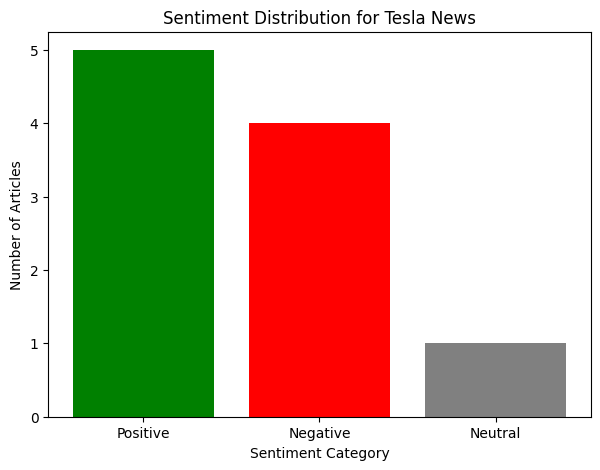


🔹 Sentiment Breakdown:
Positive: 5 articles (50.0%)
Negative: 4 articles (40.0%)
Neutral: 1 articles (10.0%)

📌 **Overall Sentiment Analysis**:
🟢 The majority of articles about Tesla have a **positive** sentiment.


In [10]:
# Check for errors
if data.get("status") == "error":
    print(f"Error from News API: {data.get('code')}, {data.get('message')}")
else:
    analyzer = SentimentIntensityAnalyzer()
    articles = data["articles"][:10]  # Get first 10 articles

    sentiment_counts = {"Positive": 0, "Negative": 0, "Neutral": 0}

    for article in articles:
        title = article["title"]
        content = article.get("content") or article.get("description", "")  # Use summary if content missing

        # Sentiment Analysis
        vader_score = analyzer.polarity_scores(content)["compound"]
        sentiment = "Positive" if vader_score > 0.05 else "Negative" if vader_score < -0.05 else "Neutral"

        sentiment_counts[sentiment] += 1  # Update sentiment count

        # Print individual sentiment
        print(f"{title} → {sentiment}")

    # Import matplotlib.pyplot
    import matplotlib.pyplot as plt # Importing the necessary library for plotting

    # Bar Chart Visualization
    plt.figure(figsize=(7, 5))
    plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=["green", "red", "gray"])
    plt.xlabel("Sentiment Category")
    plt.ylabel("Number of Articles")
    plt.title(f"Sentiment Distribution for {company} News")
    plt.show()

    # Print Summary Insights
    total_articles = sum(sentiment_counts.values())
    print("\n🔹 Sentiment Breakdown:")
    for sentiment, count in sentiment_counts.items():
        print(f"{sentiment}: {count} articles ({(count/total_articles)*100:.1f}%)")

    print("\n📌 **Overall Sentiment Analysis**:")
    if sentiment_counts["Positive"] > sentiment_counts["Negative"]:
        print(f"🟢 The majority of articles about {company} have a **positive** sentiment.")
    elif sentiment_counts["Negative"] > sentiment_counts["Positive"]:
        print(f"🔴 The majority of articles about {company} have a **negative** sentiment.")
    else:
        print(f"⚪ The sentiment for {company} is **balanced or neutral**.")

In [11]:
!pip install gTTS

# Convert Summary to Hindi Speech

In [12]:
from gtts import gTTS
from IPython.display import Audio

# Example summarized news text (Longer Summary)
summary_text = """
टेस्ला को ऑटो टैरिफ्स से महत्वपूर्ण प्रभाव पड़ेगा। एलन मस्क ने कहा कि इन नए टैरिफ्स के कारण कंपनी की लागतें बढ़ेंगी,
जो गाड़ियों की कीमतों को भी प्रभावित कर सकती हैं। उन्होंने आगे कहा कि यह फैसला ऑटोमोबाइल उद्योग में प्रतिस्पर्धा को प्रभावित कर सकता है।
इसके अलावा, टेस्ला अपने नए मॉडल्स और इलेक्ट्रिक वाहनों की बैटरी टेक्नोलॉजी पर काम कर रही है, जिससे बाजार में स्थिरता बनाए रखी जा सके।
हाल ही में टेस्ला के शेयरों में उतार-चढ़ाव देखा गया है, और निवेशकों को इस पर गहरी नजर रखने की जरूरत है।
"""

# Convert text to Hindi speech
tts = gTTS(text=summary_text, lang='hi', slow=False)

# Save the speech as an audio file
output_file = "news_summary.mp3"
tts.save(output_file)

# Display and play audio in Jupyter Notebook
Audio(output_file)
